# Statistics with Python Specialization

### NHANES
[NHANES 2015-2016](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015) dataset will be used to explore statistical inference methods taught in the course.

[National Health and Nurtrition Examination Survey (NHANES)](https://www.cdc.gov/nchs/nhanes/about_nhanes.htm) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. NHANES is a major program of the National Center for Health Statistics (NCHS). NCHS is part of the Centers for Disease Control and Prevention (CDC) and has the responsibility for producing vital and health statistics for the Nation. 

### Libraries for assessment



In [13]:
import numpy as np                  # maths function
import pandas as pd                 # dataframe
%matplotlib inline 
import matplotlib.pyplot as plt     # plots
import seaborn as sns               # plotting on top of matplot
import statsmodels.api as sm        # maths function
from statsmodels.distributions.empirical_distribution import ECDF 
import scipy.stats as stats         # maths function
import scipy.stats.distributions as dist
from scipy.stats.distributions import norm 
from scipy.stats import t
import random

### Data Preparation

In [53]:
pd.set_option('display.max_columns', 100)

df = pd.read_csv(r'D:\User\Courses\4 Statistics with Python Specialization coursera\capstone\nhanes_2015_2016.csv')

# df.shape # (5735, 28)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

According to the [Data, Documentation, Codebooks](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015) of respective data variable list, below are the metadata to each columns
- SEQN = Respondent sequence number
- ALQ101 = Alcohol use in any one year, had at least 12 drinks of any type of alcoholic beverage? 
- ALQ110 = Alcohol use in entire lifetime, had at least 12 drinks of any type of alcoholic beverage? 
- ALQ130 = Alcohol use in past 12 months, on those days that you drank alcoholic beverages, on the average, how many drinks did you have? 
- SMQ020 = Have you smoked at least 100 cigarettes in your entire life?
- RIAGENDR = Gender
- RIDRETH1 = Ethnicity
- DMDCITZN = Citizenship
- DMDEDUC2 = Education level
- DMDMARTL = Marital status
- DMDHHSIZ = No. of pax in household
- WTINT2YR = Full sample 2 year interview weight
- SDMVPSU = Masked variance unit pseudo-PSU variable for variance estimation
- SDMVSTRA = Masked variance unit pseudo-stratum variable for variance estimation
- INDFMPIR = A ratio of family income to poverty guidelines
- BPXSY1 = Systolic: Blood pressure (first reading) mm Hg
- BPXDI1 = Diastolic: Blood pressure (first reading) mm Hg
- BPXSY2 = Systolic: Blood pressure (second reading) mm Hg
- BPXDI2 = Diastolic: Blood pressure (second reading) mm Hg
- BMXWT = Weight(kg)
- BMXHT = Height(cm)
- BMXBMI = BMI
- BMXLEG = Upper Leg Length (cm)
- BMXARML = Upper Arm Length (cm)
- BMXARMC = Arm Circumference (cm)
- BMXWAIST = Waist Circumference (cm)
- HIQ210 = In the past 12 months, was there any time when {you/SP} did not have any health insurance coverage?



In [3]:
# check for duplicate rows
duplicaterows = df[df.duplicated()]
len(duplicaterows)

0

## Statistical Inference

NHANES uses a complex, multistage probability design to sample the civilian, noninstitutionalized population residing in the 50 states and D.C. Hence for purpose of this activity, NHANES data will be analysed as if it were an independent and identically distributed sample from a population.


### Confidence interval

Checking assumptions:  
1) Is it simple random sample (SRS)?
    - For purpose of this activity assume SRS
2) Large Enough Sample Size – do we have at least 10 of each outcome?
    - Yes we do

First we look at the confidence intervals for proportion of smokers at 95% confidence interval.

In [4]:
# Confidence intervals for one proportion
# as there are 2 genders provided in the dataset, the proportions of smokers will be calculated separately for females and for males.

# looking at smoker col
print(df['SMQ020'].unique() )

# looking at gender col
print(df['RIAGENDR'].unique())

[1 2 7 9]
[1 2]


According to codebook
- for smoker: 1=yes, 2=no, 7=refused, 9=don't know. 
- for gender: 1=make, 2=female

We will replace the numeric codes in the variables of interest with text labels and represent the smokers in a table

In [5]:
df["SMQ020x"] = df.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})

smokers = df[["SMQ020x", "RIAGENDRx"]].dropna()
smokersx = pd.crosstab(smokers.SMQ020x, smokers.RIAGENDRx)
smokersx

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


In [6]:
#finding the confidence interval

smokersx.Female.No
CIfemale = sm.stats.proportion_confint(smokersx.Female.Yes, smokersx.Female.No + smokersx.Female.Yes)
CImale = sm.stats.proportion_confint(smokersx.Male.Yes, smokersx.Male.No + smokersx.Male.Yes)

print(CIfemale)
print(CImale)

(0.2882949879861214, 0.32139545615923526)
(0.49458749263718593, 0.5319290347874418)


From above results, we are 95% confident that the population proportion of all females who smokes is estimated to be between 28%~32% whilst its 49%~53% for males.

Next we look at the confidence intervals for the population mean of BMI at 95% confidence interval.

In [7]:
# Confidence intervals for mean
# as there are 2 genders provided in the dataset, the proportions of BMI will be calculated separately for females and for males.

# extracting the data for respective gender BMI
female_bmi = df.loc[df.RIAGENDRx=="Female", "BMXBMI"].dropna()
male_bmi = df.loc[df.RIAGENDRx=="Male", "BMXBMI"].dropna()

print(sm.stats.DescrStatsW(female_bmi).zconfint_mean())
print(sm.stats.DescrStatsW(male_bmi).zconfint_mean())

(29.659875498090155, 30.22001580625768)
(28.543010471866523, 29.013133751827382)


From above results, we are 95% confident that the population average BMI for all females is estimated to be between 29.65~30.22 whilst its 28.54~29.01 for males.

Next we look at the confidence intervals for difference in population mean of BMI between female and males at 95% confidence interval.

In [25]:
# finding the mean, standard deviation and sample size
BMIstats = df.groupby('RIAGENDRx').agg({'BMXBMI': [np.mean, np.std, np.size]}).dropna()
BMIstats.index = ['male', 'female']
BMIstats.columns = ['meanx', 'SD', 'n']
print(BMIstats)

# mean difference between male and female
phat = BMIstats.meanx.male - BMIstats.meanx.female #-1.1618735403269653

            meanx        SD     n
male    29.939946  7.753319  2976
female  28.778072  6.252568  2759


In [12]:
# as the variance between female and male are quite different, unpooled approach will be used to calculate the standard error

# unpooled confidence interval approach
unpoolse = np.sqrt(BMIstats.SD.male**2/BMIstats.n.male + BMIstats.SD.female**2/BMIstats.n.female) #0.18538992862064452

unpooledUCB = phat + 1.98*unpoolse
unpooledLCB = phat - 1.98*unpoolse

print('unpooled CI', unpooledLCB, unpooledUCB)

unpooled CI 0.7948014816580892 1.5289455989958416


From above results, we are 95% confident that the difference in population average BMI between females and males is estimated to be between 0.79kg/$m^{2}$~1.52kg/$m^{2}$. 

### Hypothesis Testing

Checking assumptions:  

1) Is it simple random sample (SRS)?
    - For purpose of this activity assume SRS
2) Large Enough Sample Size – do we have at least 10 of each outcome?
    - Yes we do

Next we move on to hypothesis testing. We will begin with one population proportion hypothesis test.

For illustration, imagine that the rate of lifetime smoking in another country was known to be 40%, and we wished to assess whether the rate of lifetime smoking in the US were different from 40%.  

**Population**: Smokers  
**Parameter of Interest**: p  
**Null Hypothesis:** p = 0.4  
**Alternative Hypthosis:** p $\neq$ 0.4 (two-sided test)

In [19]:
pnull = 0.4

# finding the smokers rows
smokers = df.SMQ020x.dropna() == "Yes"
# average numbers of smokers
phat = smokers.mean()

standarderror = np.sqrt(pnull * (1-pnull) / len(smokers))

test_stat = (phat - pnull) / standarderror
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))

print(test_stat, pvalue)

0.7823563854332805 0.4340051581348052


as p-value of 0.43 is larger than alpha of 0.05 (95% confidence) we fail to reject the null hypothesis. There is no sufficient evidence that the rate of lifetime smoking in the US is different from 40%.

Next we look at hypothesis test for one population mean.

We wish to look at whether is the average BMI for all females collected in the NHANES data is same as the average BMI of 23.2 for females in [Singapore](https://en.wikipedia.org/wiki/List_of_countries_by_body_mass_index).


**Population**: Females  
**Parameter of Interest**: $\mu$, population mean of female BMI.  
**Null Hypothesis:** $\mu$ = 23.2  
**Alternative Hypthosis:** $\mu$ $\neq$ 23.2 (two-sided test)


In [23]:
pnull = 23.2

female_bmi = df.loc[df.RIAGENDRx=="Female", "BMXBMI"].dropna()
phat = female_bmi.mean() # 29.93994565217391
BMIsd = female_bmi.std() # 7.753318809545674

standarderror = BMIsd/np.sqrt(len(female_bmi)) # 0.14289556149649657

test_stat = (phat - pnull) / standarderror
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))

print(test_stat, pvalue)

47.1669349389775 0.0


as p-value of 0.0 is smaller than alpha of 0.05 (95% confidence) we can reject the null hypothesis. There is sufficient evidence that the average BMI for all females collected in the NHANES data is not the same as the average BMI of females in Singapore.

Next we look at hypothesis test for difference in population mean.

Considering adults in the NHANES data, do males have a significantly higher mean Body Mass Index than females?

**Population**: Adults in the NHANES data.  
**Parameter of Interest**: $\mu_1 - \mu_2$, Body Mass Index.  
**Null Hypothesis:** $\mu_1 = \mu_2$  
**Alternative Hypthosis:** $\mu_1 \neq \mu_2$

In [26]:
BMIstats = df.groupby('RIAGENDRx').agg({'BMXBMI': [np.mean, np.std, np.size]}).dropna()
BMIstats.index = ['male', 'female']
BMIstats.columns = ['meanx', 'SD', 'n']
print(BMIstats)

            meanx        SD     n
male    29.939946  7.753319  2976
female  28.778072  6.252568  2759


In [29]:
female_bmi = df.loc[df.RIAGENDRx=="Female", "BMXBMI"].dropna()
male_bmi = df.loc[df.RIAGENDRx=="Male", "BMXBMI"].dropna()


phat = BMIstats.meanx.male - BMIstats.meanx.female #-1.1618735403269653

# as the variance between female and male are quite different, unpooled approach will be used to calculate the standard error

#unpooled approach SE
unpoolse = np.sqrt(BMIstats.SD.male**2/BMIstats.n.male + BMIstats.SD.female**2/BMIstats.n.female) #0.18538992862064452

bmiTvalueunpool = (phat - 0) / unpoolse #-6.267188023489979

BMIpvalueunpool = t.cdf(bmiTvalueunpool, (BMIstats.n.male+BMIstats.n.female-2)) 
#1.9720930982762633e-10

print(bmiTvalueunpool, BMIpvalueunpool)

-6.267188023489979 1.9720930982762633e-10


as p-value of 1.9720930982762633e-10 is smaller than alpha of 0.05 (95% confidence) we can reject the null hypothesis. There is sufficient evidence to suggest that males have a significantly higher mean Body Mass Index than females.

### Data Modeling

Lastly we move to modeling structure. Models have two primary characteristics,  Dependent Variables (DVs) and Independent Variables (IVs). 

We will focus on systolic [blood pressure](https://en.wikipedia.org/wiki/Blood_pressure) (SBP) as the outcome (dependent) variable.  That is, we will predict SBP from other variables.  SBP is an important indicator of cardiovascular health.  It tends to increase with age, is greater for overweight people (i.e. people with greater body mass index or BMI), and also differs among demographic groups, for example among gender and ethnic groups. We will look at the following independent variables:
- RIDAGEYR - age
- RIAGENDR - gender
- RIDRETH1 - ethnicity
- DMDEDUC2 - education level
- BMXBMI - BMI
- SMQ020 - smoked at least 100 cigarettes in {your/his/her} entire life?

In [35]:
# first drop unused columns, and drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = df[vars].dropna()


      BPXSY1  RIDAGEYR  RIAGENDR  RIDRETH1  DMDEDUC2  BMXBMI  SMQ020
0      128.0        62         1         3       5.0    27.8       1
1      146.0        53         1         3       3.0    30.8       1
2      138.0        78         1         3       3.0    28.8       1
3      132.0        56         2         3       5.0    42.4       2
4      100.0        42         2         4       4.0    20.3       2
...      ...       ...       ...       ...       ...     ...     ...
5730   112.0        76         2         3       3.0    21.5       1
5731   118.0        26         1         3       5.0    33.8       2
5732   154.0        80         2         3       4.0    31.0       1
5733   104.0        35         1         3       1.0    26.0       1
5734   118.0        24         2         3       5.0    21.4       2

[5102 rows x 7 columns]


One of the most important steps in modeling is understanding the relationship our variables have with each other.  A relationship between two variables is also denoted as correlation in statistics.  A figure known as a correlation matrix, can be used to measure the linear relationships between variables.

          BPXSY1  RIDAGEYR  RIAGENDR  RIDRETH1  DMDEDUC2  BMXBMI  SMQ020
BPXSY1      1.00      0.46     -0.10     -0.01     -0.15    0.12   -0.08
RIDAGEYR    0.46      1.00     -0.02     -0.04     -0.14    0.02   -0.12
RIAGENDR   -0.10     -0.02      1.00     -0.03      0.03    0.08    0.19
RIDRETH1   -0.01     -0.04     -0.03      1.00      0.31   -0.16    0.01
DMDEDUC2   -0.15     -0.14      0.03      0.31      1.00   -0.05    0.09
BMXBMI      0.12      0.02      0.08     -0.16     -0.05    1.00   -0.02
SMQ020     -0.08     -0.12      0.19      0.01      0.09   -0.02    1.00


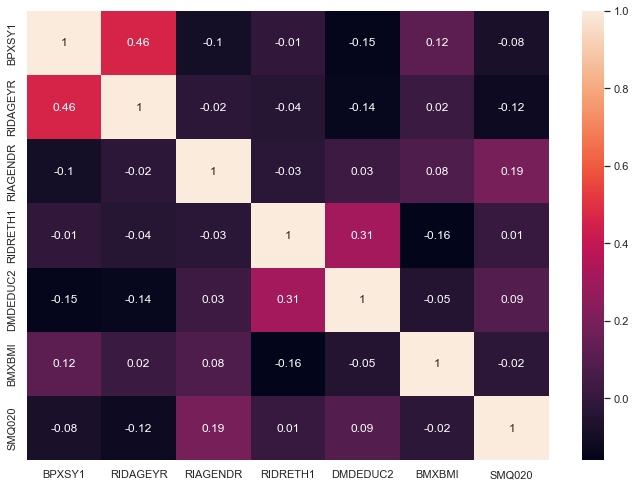

In [36]:
correlation_matrix = da.corr().round(2)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

With this heatmap, we can see correlation coefficients for each of our potential predictors values and **BPXSY1**, our target values. Its interesting to see that **RIDAGEYR** (age) has a higher correlation coefficient compared to **BMXBMI** (BMI).

Since SBP is a quantitative variable, we will model it using linear regression. We start with a simple linear regression model **with only one covariate, age**, predicting SBP.  

In [38]:
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR", data=da)

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1333.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          2.09e-259
Time:                        14:54:19   Log-Likelihood:                -21530.
No. Observations:                5102   AIC:                         4.306e+04
Df Residuals:                    5100   BIC:                         4.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.0935      0.685    149.120      0.000     100.751     103.436
RIDAGEYR       0.4759      0.013     36.504      0.000       0.450       0.501
==============================================================================
Omnibus:                      690.261   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1505.999
Skew:                           0.810   Prob(JB):                         0.00
Kurtosis:                       5.112   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We will focus on the center section of the output where the header begins with __coef__.  This section contains the estimated values of the parameters of the regression model, their standard errors, and other values that are used to quantify the uncertainty in the regression parameter estimates. 

This fitted model implies that when comparing two people whose ages differ by one year, the older person will on average have 0.4759 units higher SBP than the younger person. This difference is statistically significant, based on the p-value shown under the column labeled __`P>|t|`__ is lesser than alpha of 0.05.  This means that there is strong evidence that there is a real association between between systolic blood pressure and age in this population.

#### Adding a second variable

Above we considered a simple linear regression analysis with only one covariate (age) predicting systolic blood pressure (SBP).  As noted above, SBP is expected to be related to gender as well as to age, so we next add gender to the model.  

In [40]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

model2 = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx", data=da)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     697.4
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.87e-268
Time:                        15:00:16   Log-Likelihood:                -21505.
No. Observations:                5102   AIC:                         4.302e+04
Df Residuals:                    5099   BIC:                         4.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           100.6305      0.712    141.257      0.000      99.234     102.027
RIAGENDRx[T.Male]     3.2322      0.459      7.040      0.000       2.332       4.132
RIDAGEYR              0.4739      0.013     36.518      0.000       0.448       0.499
==============================================================================
Omnibus:                      706.732   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1582.730
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       5.184   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model finds that two people with the same gender whose ages differ by one year tend to have blood pressure values differing by 0.47 units, which is essentially the same age parameter that we found above in the model based on age alone.  This model also shows us that comparing a man and a woman of the same age, the man will on average have 3.23 units greater SBP.

It is important to also emphasize that the age coefficient of 0.47 is only meaningful when comparing two people of the same gender, and the gender coefficient of 3.23 is only meaningful when comparing two
people of the same age. Moreover, these effects are additive, meaning that if we compare, say, a 50 year old man to a 40 year old woman, the man's blood pressure will on average be around 3.23 + 10*0.47 = 7.93 units higher, with the first term in this sum being attributable to gender, and the second term being attributable to age.

We noted above that the regression coefficient for age did not change by much when we added gender to the model. In general, the estimated coefficient of a variable in a regression model will change when other variables are added or removed. The only circumstance in which a regression parameters is unchanged when other variables are added or removed from the model is when those variables are uncorrelated with the variables that remain in the model. So to say there is little correlation between age and gender, which is true.

Above correlation matrix we confirm that gender and age are nearly uncorrelated in this data set (the correlation of around -0.02 is negligible).  Thus, it is expected that when we add gender to the model, the age coefficient is unaffected.

#### Categorical variables and reference levels

In the model fit above, gender is a categorical variable, and only a coefficient for males is included in the regression output (i.e. there is no coefficient for females in the tables above).  

Whenever a categorical variable is used as a covariate in a regression model, one level of the variable is omitted and is automatically given a coefficient of zero. This level is called the **reference level** of the covariate. Here, the female level of the gender variable is the reference level.  

This does not mean that being a woman has no impact on blood pressure.  It simply means that we have written the model so that female blood pressure is the default, and the coefficient for males (3.23) shifts the blood pressure by that amount for males only.

#### A model with three variables

Next we add a third variable, body mass index (BMI), to the model predicting SBP. 

In [41]:
model3 = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + BMXBMI + RIAGENDRx", data=da)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     502.0
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          8.54e-286
Time:                        15:21:33   Log-Likelihood:                -21461.
No. Observations:                5102   AIC:                         4.293e+04
Df Residuals:                    5098   BIC:                         4.296e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            91.5840      1.198     76.456      0.000      89.236      93.932
RIAGENDRx[T.Male]     3.5783      0.457      7.833      0.000       2.683       4.474
RIDAGEYR              0.4709      0.013     36.582      0.000       0.446       0.496
BMXBMI                0.3060      0.033      9.351      0.000       0.242       0.370
==============================================================================
Omnibus:                      752.325   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.087
Skew:                           0.847   Prob(JB):                         0.00
Kurtosis:                       5.343   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Not surprisingly, BMI is positively associated with SBP. Given two subjects with the same gender and age, and whose BMI differs by 1 unit, the person with greater BMI will have, on average, 0.31 units greater systolic blood pressure (SBP).  After adding BMI to the model, the coefficient for gender became somewhat greater (from 3.23 to 3.57). This is due to the fact that the three covariates in the model, age, gender, and BMI, are mutually correlated, as seen from correlation matrix above.

Although the correlations among these three variables are not strong, they are sufficient to induce fairly substantial differences in the regression coefficients.

### Logistic regression

Next we look at regression models for *binary* outcome variables, meaning an outcome that can take on only two distinct values. We will focus on variable SMQ020 as the outcome (dependent) variable.  That is, we will predict SMQ020 from other variables. Below we create a version of this variable in which smoking and non-smoking are coded as 1 and 0, respectively, and rare responses like *don't know* and *refused to answer* are coded as missing values.

We then fit the model using the `GLM` function, where `GLM` stands for *Generalized Linear Model*.

In [48]:
da["smq"] = da.SMQ020.replace({2: 0, 7: np.nan, 9: np.nan})

model4 = sm.GLM.from_formula("smq ~ RIAGENDRx", family=sm.families.Binomial(), data=da)

resultGLM = model4.fit()
resultGLM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5092
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3350.6
Date:                Wed, 21 Sep 2022   Deviance:                       6701.2
Time:                        16:17:40   Pearson chi2:                 5.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04557
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7547      0.042    -18.071      0.000      -0.837      -0.673
RIAGENDRx[T.Male]     0.8851      0.058     15.227      0.000       0.771       0.999
=====================================================================================
"""

We can see the connection between logistic regression and the log odds statistic, the logistic regression coefficient (0.8851 per above model) for male gender is exactly equal to the difference between the log odds statistics for males and females:

In [47]:
c = pd.crosstab(da.RIAGENDRx, da.smq).apply(lambda x: x/x.sum(), axis=1)
c["odds"] = c.loc[:, 1] / c.loc[:, 0]

c["logodds"] = np.log(c.odds)
print(c, '\n')
print(c.logodds.Male - c.logodds.Female)

smq             0.0       1.0      odds   logodds
RIAGENDRx                                        
Female     0.680197  0.319803  0.470162 -0.754679
Male       0.467453  0.532547  1.139252  0.130371 

0.8850500036644218


#### Adding additional covariates

Below we fit a logistic regression for smoking status using age (RIDAGEYR) and gender as covariates.

In [49]:
model5 = sm.GLM.from_formula("smq ~ RIDAGEYR + RIAGENDRx", family=sm.families.Binomial(), data=da)
resultGLM2 = model5.fit()
resultGLM2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5091
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3296.6
Date:                Wed, 21 Sep 2022   Deviance:                       6593.2
Time:                        16:18:09   Pearson chi2:                 5.10e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06558
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.6166      0.095    -16.985      0.000      -1.803      -1.430
RIAGENDRx[T.Male]     0.8920      0.059     15.170      0.000       0.777       1.007
RIDAGEYR              0.0172      0.002     10.289      0.000       0.014       0.021
=====================================================================================
"""

This fitted model suggests that older people are more likely to have a history of smoking than younger people.  The log odds for smoking increases by 0.017 for each year of age.  This effect is additive, so that comparing two people whose ages differ by 20 years, the log odds of the older person smoking will be around 0.34 units (0.0172*20) greater than the log odds for the younger person smoking, and the odds for the older person smoking will be around `exp(0.34) = 1.4` (e^0.34) times greater than the odds for the younger person smoking.

The greater prevalence of smoking history among older people could be partly due to the definition of smoking status that we are using here -- an older person has had more time to smoke 99 cigarettes than a younger person.  However most people who smoke begin when they are young, and the smoking rate in the US has been slowly declining for several decades.  Thus, it is likely that the increased smoking levels in older people are driven primarily by real shifts in behavior.

As with linear regression, the roles of age and gender in the logistic regression model can be seen as being additive, but here the additivity is on the scale of log odds, not odds or probabilities.  If we compare a 30 year old female to a 50 year old male, the log odds for the male being a smoker are `0.89 + 0.34 = 1.23` units greater than the log odds for the female being a smoker.  The value of 0.89 in this expression is the change attributable to gender, and the value of 0.34 is the change attributable to age (0.34 = 20* 0.0172).  

Again, we can exponentiate to convert these effects from the log odds scale to the odds scale.  Since `exp(0.89 + 0.34) = exp(0.89)*exp(0.34) = 2.44*1.41` we can state that male gender is associated with a 2.44 fold increase in the odds of smoking, and 20 years of age is associated with a 1.41 fold increase in the odds for smoking.  These two effects are multiplied when discussing the odds, so a 50 year old man has `exp(1.23) = 3.42` (same as 2.44* 1.41) fold greater odds of smoking than a 30 year old woman.

#### A logistic regression model with three predictors

Lastly we fit a logistic regression model, again for smoking, including educational attainment as a predictor. We will recode the educational values so that the meaning of the levels becomes more clear.  We will call the recoded variable `DMDEDUC2x`.

In [52]:
'''
1	Less than 9th grade	= lt9	
2	9-11th grade (Includes 12th grade with no diploma) = x9_11
3	High school graduate/GED or equivalent = HS
4	Some college or AA degree = SomeCollege
5	College graduate or above = College
7	Refused = NA
9	Don't Know = NA
.	Missing
'''

# Create a labeled version of the educational attainment variable
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "lt9", 2: "x9_11", 3: "HS", 4: "SomeCollege", 5: "College", 7: np.nan, 9: np.nan})

model6 = sm.GLM.from_formula("smq ~ RIDAGEYR + RIAGENDRx + DMDEDUC2x", family=sm.families.Binomial(), data=da)
resultGLM3 = model6.fit()
resultGLM3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5093
Model:                            GLM   Df Residuals:                     5086
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3201.2
Date:                Wed, 21 Sep 2022   Deviance:                       6402.4
Time:                        18:30:28   Pearson chi2:                 5.10e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09976
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -2.3060      0.114    -20.174      0.000      -2.530      -2.082
RIAGENDRx[T.Male]            0.9096      0.060     15.118      0.000       0.792       1.028
DMDEDUC2x[T.HS]              0.9434      0.090     10.521      0.000       0.768       1.119
DMDEDUC2x[T.SomeCollege]     0.8322      0.084      9.865      0.000       0.667       0.998
DMDEDUC2x[T.lt9]             0.2662      0.109      2.438      0.015       0.052       0.480
DMDEDUC2x[T.x9_11]           1.0986      0.107     10.296      0.000       0.889       1.308
RIDAGEYR                     0.0183      0.002     10.582      0.000       0.015       0.022
============================================================================================
"""

We see that the "Female" level of the gender variable, and the "College" level of the educational attainment variable are the reference levels, as they are not shown in the output above. All non-reference coefficients for the educational attainment are positive, while the `College` coefficient, as the reference coefficient, is exactly zero.  

Thus, we see that people with a college degree have the lowest rate of smoking, followed by people with less than 9 years of schooling (lt9), then (after a large gap) people with some college, then people with a high school degree (HS), and finally (with the greatest rate of smoking), people with 9-11 years of schooling (x9_11).

The overall story here is that smoking rates are much lower for people who graduated from college or did not start high school, presumably for very different reasons.  On the other hand, people with some high school, people who completed high school, and people who began but did not complete college have much higher rates of smoking. 

###